In [6]:
import numpy as np
import pandas as pd
import os


In [33]:
excel_dir = 'C:/Users/ohds/Desktop/통합 문서1.xlsx'

df = pd.read_excel(excel_dir, sheet_name = 'Sheet2', header = 0)


In [109]:
df_2020 = df.iloc[:12,:8]
df_2020
df_2021 = df.iloc[13:24,:8]
df_2021 = df_2021[['month', 'number', 'price','all','vaccineall','vaccinenormal','vaccinewarn','new']]
df_2021

,month,number,price,all,vaccineall,vaccinenormal,vaccinewarn,new
13,2021년 2월,52,101.58,566,3689.0,3643.0,46.0,11523
14,2021년 3월,47,101.84,611,5997.0,5932.0,65.0,13608
15,2021년 4월,68,102.00,739,5515.0,5357.0,158.0,18995
16,2021년 5월,61,102.00,708,17630.0,16164.0,1466.0,18165
17,2021년 6월,66,102.00,712,61066.0,58106.0,2960.0,16924
18,2021년 7월,127,102.30,742,22147.0,21098.0,1049.0,42064
19,2021년 8월,120,102.80,734,74512.0,71994.0,2518.0,53658
20,2021년 9월,108,103.20,529,114753.0,111325.0,3428.0,60328
21,2021년 10월,114,103.40,532,79959.0,77832.0,2127.0,52613
22,2021년 11월,106,103.90,592,24421.0,23450.0,971.0,85964


In [85]:
print(df_2021.dtypes)

month             object
number             int64
new                int64
price            float64
all                int64
vaccineall       float64
vaccinenormal    float64
vaccinewarn      float64
dtype: object


In [41]:
df_corr = df.corr()
df_corr
df20_corr = df_2020.corr()
df21_corr = df_2021.corr()
print(df_corr)
print(df20_corr)
print(df21_corr)

                    new    number     price       all  vaccineall  \
new            1.000000  0.143057  0.807782 -0.392077    0.030837   
number         0.143057  1.000000 -0.004735  0.695390    0.169832   
price          0.807782 -0.004735  1.000000 -0.485075    0.289858   
all           -0.392077  0.695390 -0.485075  1.000000   -0.086232   
vaccineall     0.030837  0.169832  0.289858 -0.086232    1.000000   
vaccinenormal  0.028452  0.168641  0.289243 -0.088073    0.999921   
vaccinewarn    0.101755  0.192907  0.285590 -0.022690    0.922476   
agreeavg       0.029338 -0.013288 -0.015442 -0.365609    0.316032   
Unnamed: 9          NaN       NaN       NaN       NaN         NaN   
Unnamed: 10         NaN       NaN       NaN       NaN         NaN   
Unnamed: 11         NaN       NaN       NaN       NaN         NaN   
Unnamed: 12         NaN       NaN       NaN       NaN         NaN   
Unnamed: 13         NaN       NaN       NaN       NaN         NaN   
Unnamed: 14         NaN       NaN 

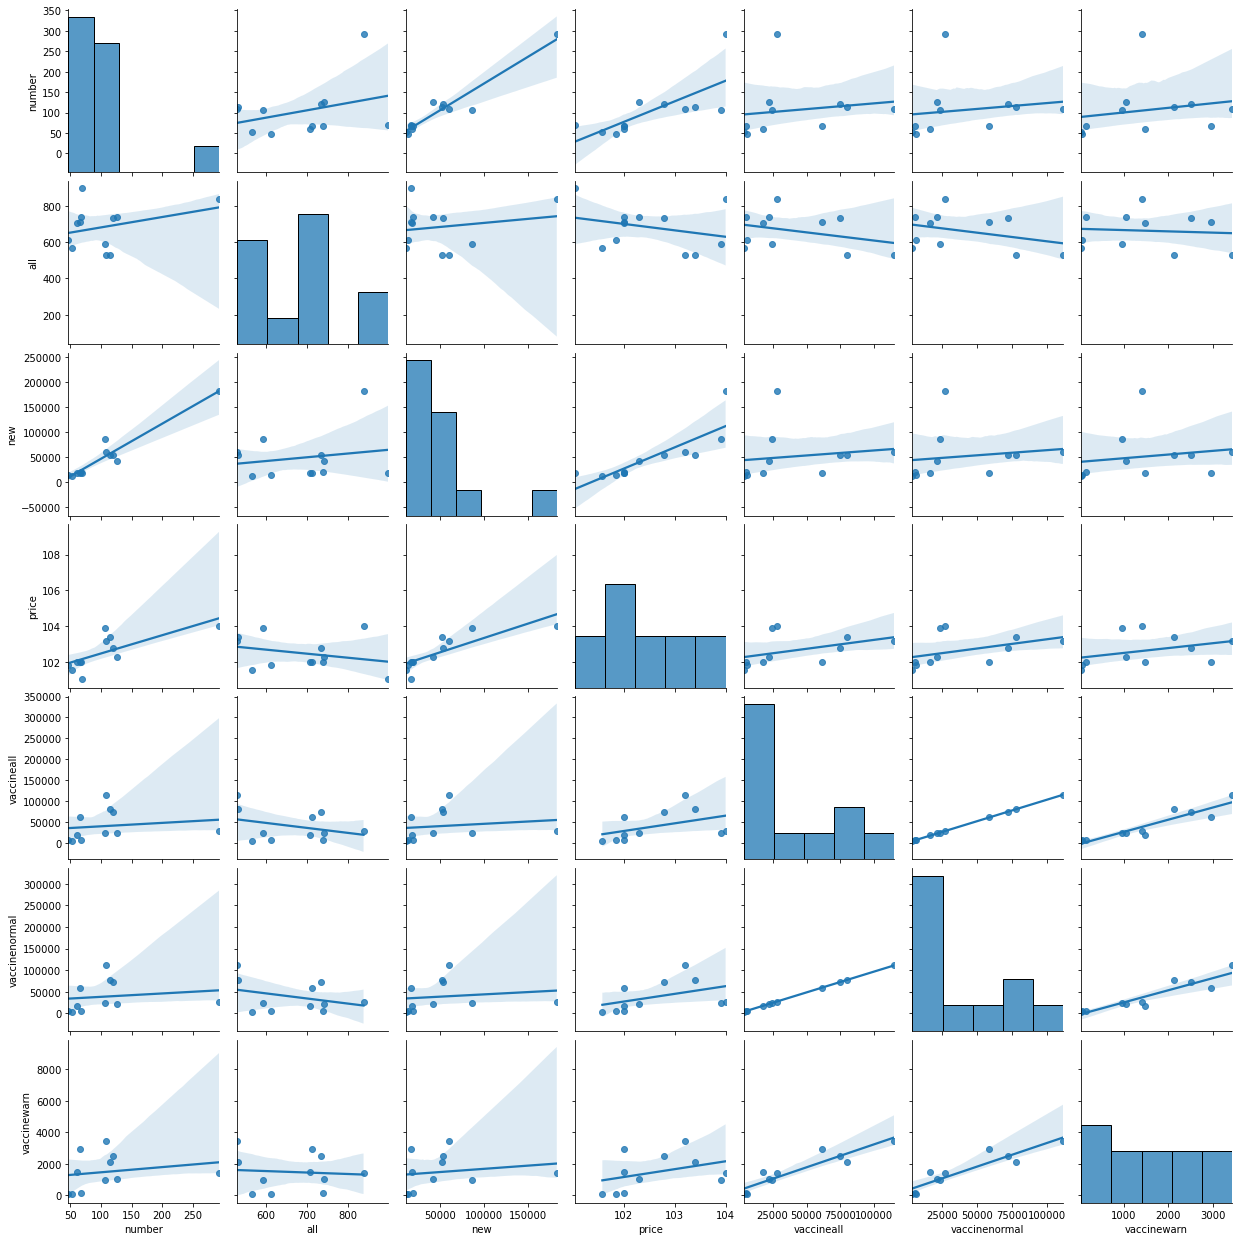

In [43]:
cols = ["number", "all", "new","price","vaccineall","vaccinenormal","vaccinewarn"]
sns.pairplot(df_2021[cols], kind='reg')
plt.show()

In [44]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
## 전진 단계별 선택법
variables = df_2021.columns[3:].tolist() ## 설명 변수 리스트

y = df_2021['number'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.4
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder, dtype='float64') ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df_2021[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df_2021[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_2021[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

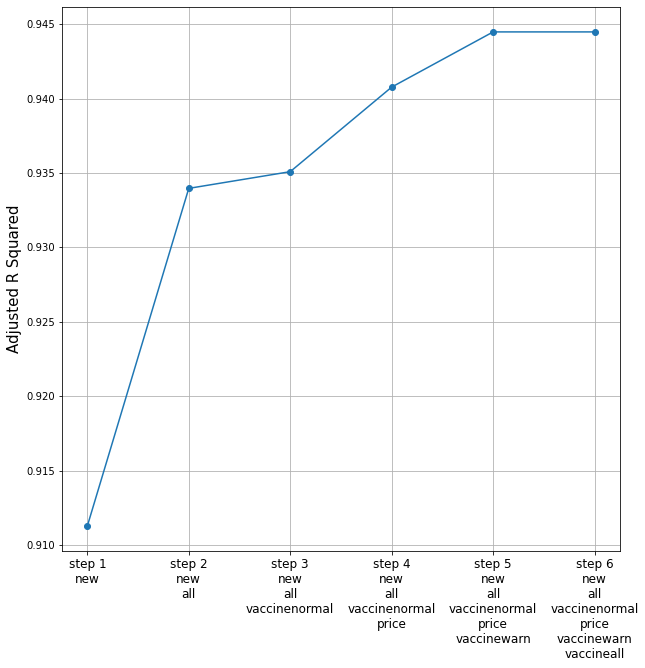

In [119]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [112]:
## 후진 소거법
variables = df_2021.columns[2:].tolist() ## 설명 변수 리스트
 
y = df_2021['number'] ## 반응 변수
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df_2021[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_2021[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [118]:
## 전진 선택법
variables = df_2021.columns[2:].tolist() ## 설명 변수 리스트
 
y = df_2021['number'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.4
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df_2021[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_2021[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-118-ccacf9093247>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-118-ccacf9093247>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-118-ccacf9093247>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-118-ccacf9093247>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)

In [7]:
# base_dir = 'C:/Users/ohds/Desktop'
# excel_file = '코로나청원2.xlsx'
# excel_dir = os.path.join(base_dir, excel_file)

excel_dir = "C:/Users/ohds/Desktop/공부공부/0000데이터 교육/프로젝트/청원크롤링(1~2700)최종1.xlsx"

df2 = pd.read_excel(excel_dir, sheet_name = 'Sheet1', header = 0, 
                                dtype = {'pageindex': int, 'title': str, 'date': str, 'agree': str})


In [8]:
df2 = df2[df2['title'].str.contains('코로나|오미크론|감염|방역|pcr|PCR|Pcr|자가격리|격리|진단|백신|아스트라제네카|화이자|모더나|패스|패쓰|pass|거리두기|우한|코노라|폐렴')]

In [9]:
base_dir = "C:/Users/ohds/Desktop" 
file_nm = "코로나청원.xlsx"
xlxs_dir = os.path.join(base_dir, file_nm) 

df2.to_excel(xlxs_dir, index = False)

In [14]:
base_dir = 'C:/Users/ohds/Desktop'
excel_file = '코로나청원2.xlsx'
excel_dir2 = os.path.join(base_dir, excel_file)

df3 = pd.read_excel(excel_dir2, sheet_name = 'Sheet2', header = 0, 
                                dtype = {'date': str, 'number': int, 'all': int, 'new': int})


ValueError: Unable to convert column guri1 to type <class 'int'>

In [17]:
df_corr = df3.corr()
df_corr

,number,all,new,guri1
number,1.000000,0.769694,0.143899,NaN
all,0.769694,1.000000,-0.050658,NaN
new,0.143899,-0.050658,1.000000,NaN
guri1,NaN,NaN,NaN,NaN


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

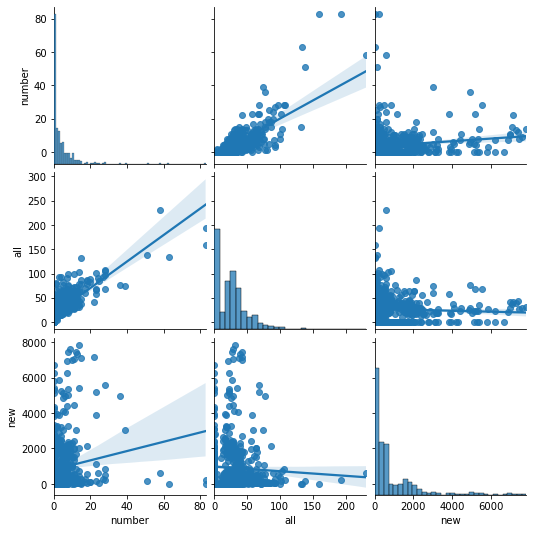

In [21]:
cols = ["number", "all", "new"]
sns.pairplot(df3[cols], kind='reg')
plt.show()

In [24]:
df2

,pageindex,title,date,agree
0,1,코로나 환자의 격리해제에 대한 법령 개정을 촉구합니다.,2022-02-03,"1,244명"
1,1,대통령은 나한테 월급주는 사장이 아닙니다.(방역패스 거부하고 싶습니다),2022-02-03,"3,144명"
6,1,중국 시안 봉쇄령에 따른 격리자에 대한 관심 부탁드립니다,2022-02-03,464명
9,2,백신패스를 없애주세요. 부탁드립니다.,2022-02-03,"3,749명"
10,2,방역패스 연장이 아닌 철회를 부탁드립니다!!!!!,2022-02-03,"2,651명"
...,...,...,...,...
18796,2686,신종 코로나 바이러스로 인한 한시적 공매도 금지를 강력히 요구합니다!!!,2020-03-01,"1,858명"
18864,2695,중국폐렴,2020-02-22,"10,944명"
18865,2696,중국에서시작한 '우한폐렴' 코로나바이러스 한국에퍼지지않도록해주세요,2020-02-22,"63,674명"
18868,2696,우한폐렴 중국인관광객 막아주세요,2020-02-22,"21,242명"
